In [91]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the CSV file into a DataFrame
data = pd.read_csv('../../data/sleep_patterns/V6_student_sleep_patterns.csv')

# Display basic information about the DataFrame
data.info()

# Display summary statistics for numerical columns
data.describe()

# Display the number of missing values in each column
data.isnull().sum()

# Display the unique values in each column
for column in data.columns:
    print(f"{column}: {data[column].unique()}")




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student_ID         500 non-null    int64  
 1   Age                500 non-null    int64  
 2   Gender             500 non-null    object 
 3   University_Year    500 non-null    object 
 4   Sleep_Duration     500 non-null    float64
 5   Study_Hours        500 non-null    float64
 6   Screen_Time        500 non-null    float64
 7   Caffeine_Intake    500 non-null    int64  
 8   Physical_Activity  500 non-null    float64
 9   Sleep_Quality      500 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 39.2+ KB
Student_ID: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60 

In [92]:
# Drop rows with missing values
data = data.dropna()

# Encode categorical variables
data['Gender'] = data['Gender'].astype('category').cat.codes
data['University_Year'] = data['University_Year'].astype('category').cat.codes

# Separate features and target
X = data.drop(['Sleep_Quality'], axis=1)
y = data['Sleep_Quality']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


The output provided below is the result of evaluating a Decision Tree classifier on the student sleep pattern dataset:


1. **Accuracy**:
    ```python
    Accuracy: 0.13
    ```
    This indicates that the Decision Tree classifier correctly predicted the sleep quality for 13% of the test samples.

2. **Classification Report**:
    ```python
    print(classification_report(y_test, y_pred))
    ```
    This provides detailed metrics for each class, including precision, recall, and F1-score. For example, for class `-3`, the precision is 1.00, the recall is 0.40, and the F1-score is 0.57. The support is the number of actual occurrences of the class in the test set, which is 5 for class `-3`.

3. **Cross-Validation Scores**:
    ```python
    Cross-validation scores: [0.14, 0.13, 0.05, 0.06, 0.05]
    Mean cross-validation score: 0.086
    ```
    The cross-validation scores show the accuracy of the model on different subsets of the training data. The mean cross-validation score (0.086) indicates the average performance of the model across these subsets.

Overall, the output suggests that the Decision Tree classifier is not performing well on this dataset, as indicated by the low accuracy and cross-validation scores. This could be due to various reasons such as overfitting, underfitting, or the need for better feature engineering or model tuning.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
report = classification_report(y_test, y_pred)
print(report)

# Perform cross-validation
cv_scores = cross_val_score(clf, X_scaled, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")



Accuracy: 0.13
              precision    recall  f1-score   support

          -3       1.00      0.40      0.57         5
          -2       0.00      0.00      0.00         4
          -1       0.00      0.00      0.00         6
           0       0.17      0.25      0.20         4
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         9
           4       0.25      0.22      0.24         9
           5       0.10      0.12      0.11         8
           6       0.20      0.08      0.12        12
           7       0.20      0.10      0.13        10
           8       0.14      0.30      0.19        10
           9       0.25      0.33      0.29         6
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14

In [94]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### The Decision Tree Visualized:

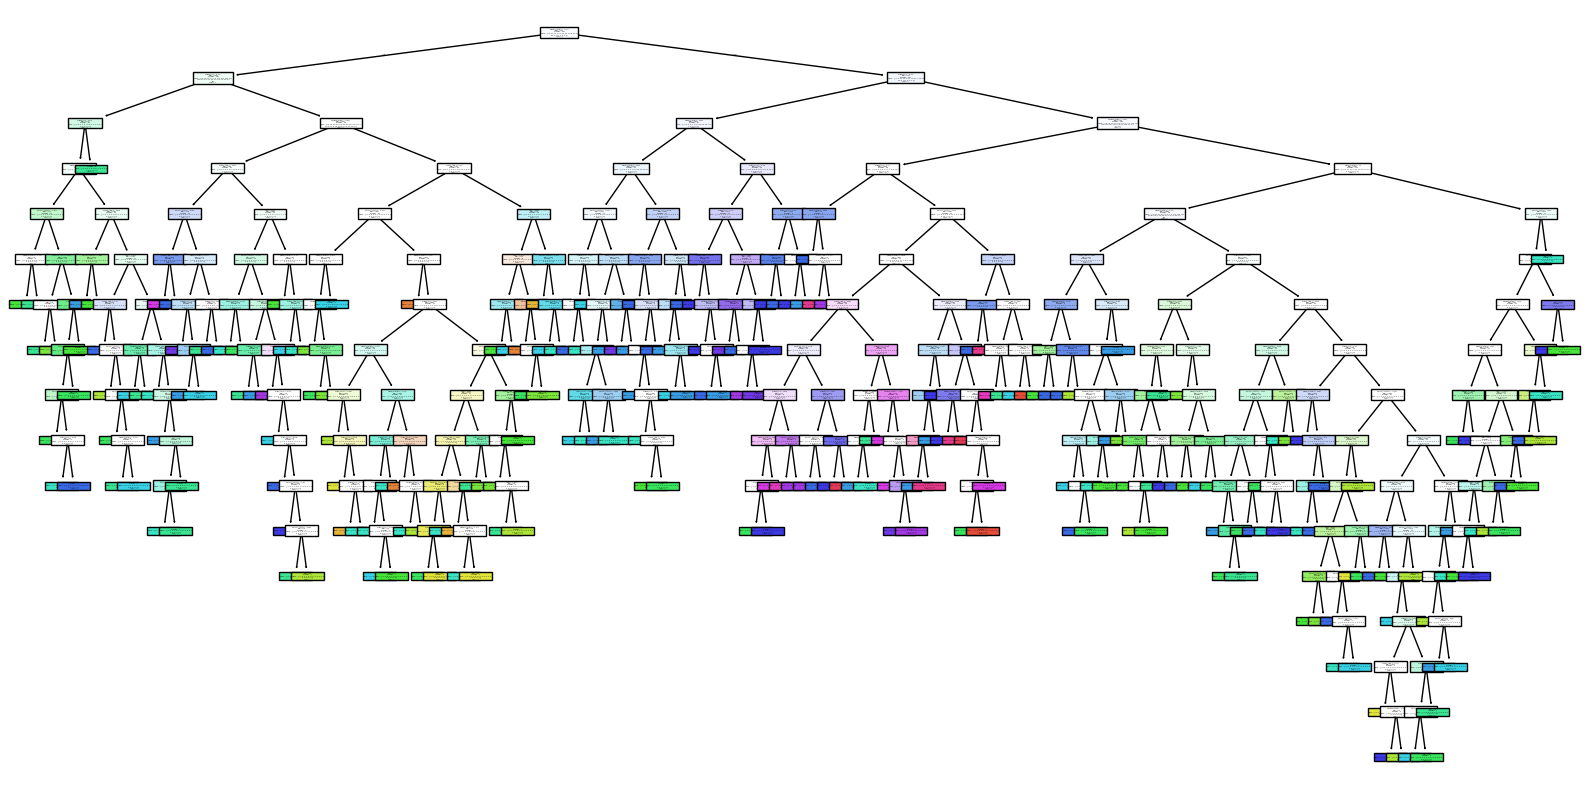

In [95]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=[str(i) for i in y.unique()])
plt.show()

In [96]:
from sklearn.tree import export_text

tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)

|--- Sleep_Duration <= -0.35
|   |--- Student_ID <= -0.71
|   |   |--- Student_ID <= -0.82
|   |   |   |--- Sleep_Duration <= -1.09
|   |   |   |   |--- Physical_Activity <= -0.86
|   |   |   |   |   |--- Sleep_Duration <= -1.46
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- Sleep_Duration >  -1.46
|   |   |   |   |   |   |--- class: 4
|   |   |   |   |--- Physical_Activity >  -0.86
|   |   |   |   |   |--- University_Year <= -0.88
|   |   |   |   |   |   |--- Age <= -0.23
|   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |--- Age >  -0.23
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- University_Year >  -0.88
|   |   |   |   |   |   |--- Student_ID <= -0.83
|   |   |   |   |   |   |   |--- Physical_Activity <= 0.20
|   |   |   |   |   |   |   |   |--- Physical_Activity <= -0.67
|   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |--- Physical_Activity >  -0.67
|   |   |   |   |   |   |   |   |   |--- Stu

In [97]:
# Get feature importances
feature_importances = pd.DataFrame(clf.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                   importance
Sleep_Duration       0.215002
Student_ID           0.164554
Physical_Activity    0.159732
Screen_Time          0.124320
Caffeine_Intake      0.094143
Age                  0.093245
Study_Hours          0.080431
University_Year      0.041847
Gender               0.026726


### Pruning the Tree to reduce complexity:

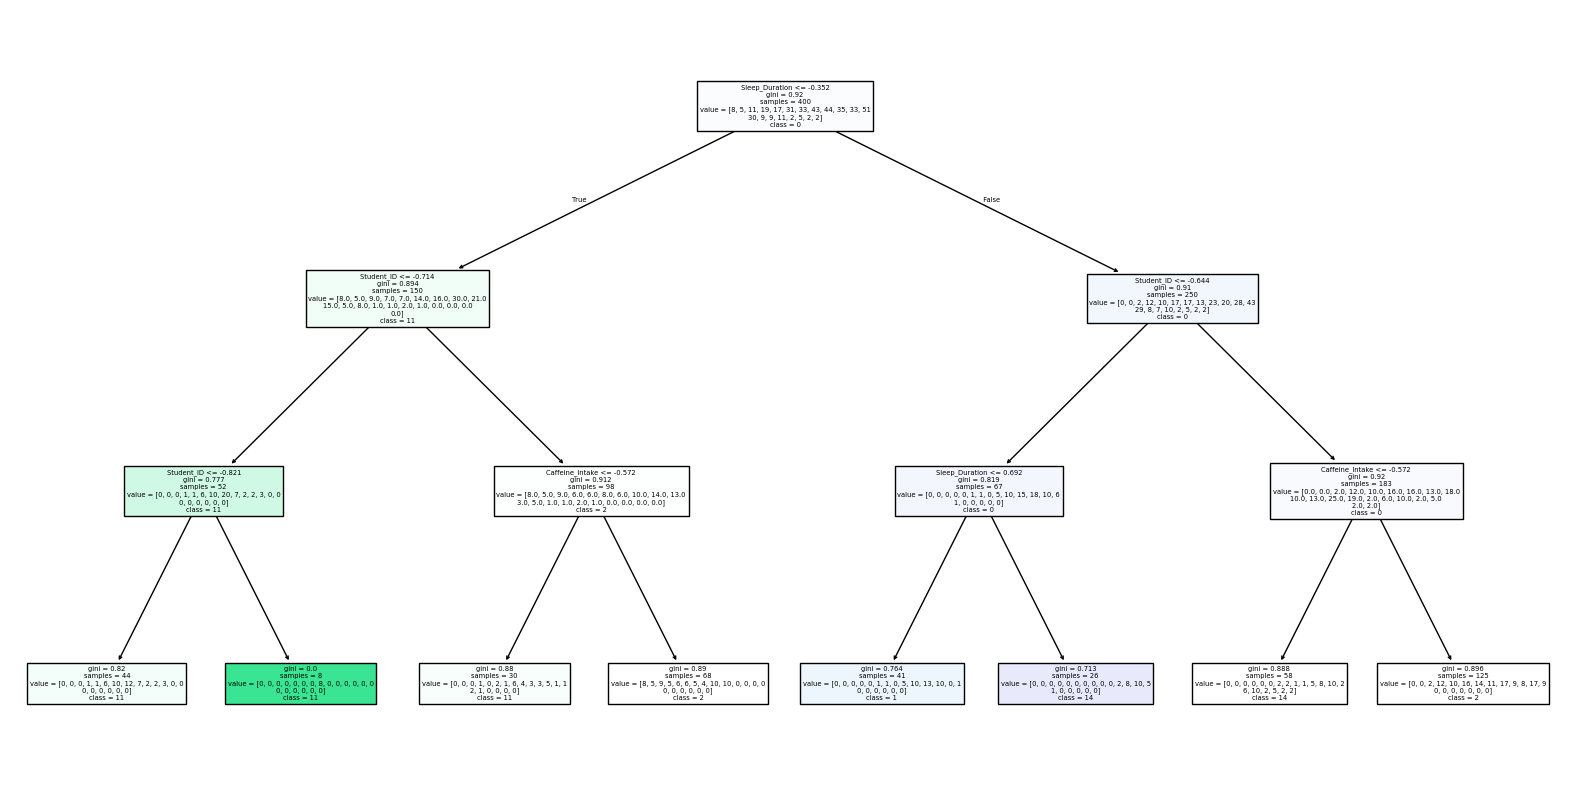

In [98]:
clf_pruned = DecisionTreeClassifier(random_state=42, max_depth=3)
clf_pruned.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(clf_pruned, filled=True, feature_names=X.columns, class_names=[str(i) for i in y.unique()])
plt.show()

In [99]:
pruned_tree_rules = export_text(clf_pruned, feature_names=list(X.columns))
print(pruned_tree_rules)

|--- Sleep_Duration <= -0.35
|   |--- Student_ID <= -0.71
|   |   |--- Student_ID <= -0.82
|   |   |   |--- class: 4
|   |   |--- Student_ID >  -0.82
|   |   |   |--- class: 4
|   |--- Student_ID >  -0.71
|   |   |--- Caffeine_Intake <= -0.57
|   |   |   |--- class: 4
|   |   |--- Caffeine_Intake >  -0.57
|   |   |   |--- class: 5
|--- Sleep_Duration >  -0.35
|   |--- Student_ID <= -0.64
|   |   |--- Sleep_Duration <= 0.69
|   |   |   |--- class: 7
|   |   |--- Sleep_Duration >  0.69
|   |   |   |--- class: 9
|   |--- Student_ID >  -0.64
|   |   |--- Caffeine_Intake <= -0.57
|   |   |   |--- class: 9
|   |   |--- Caffeine_Intake >  -0.57
|   |   |   |--- class: 5



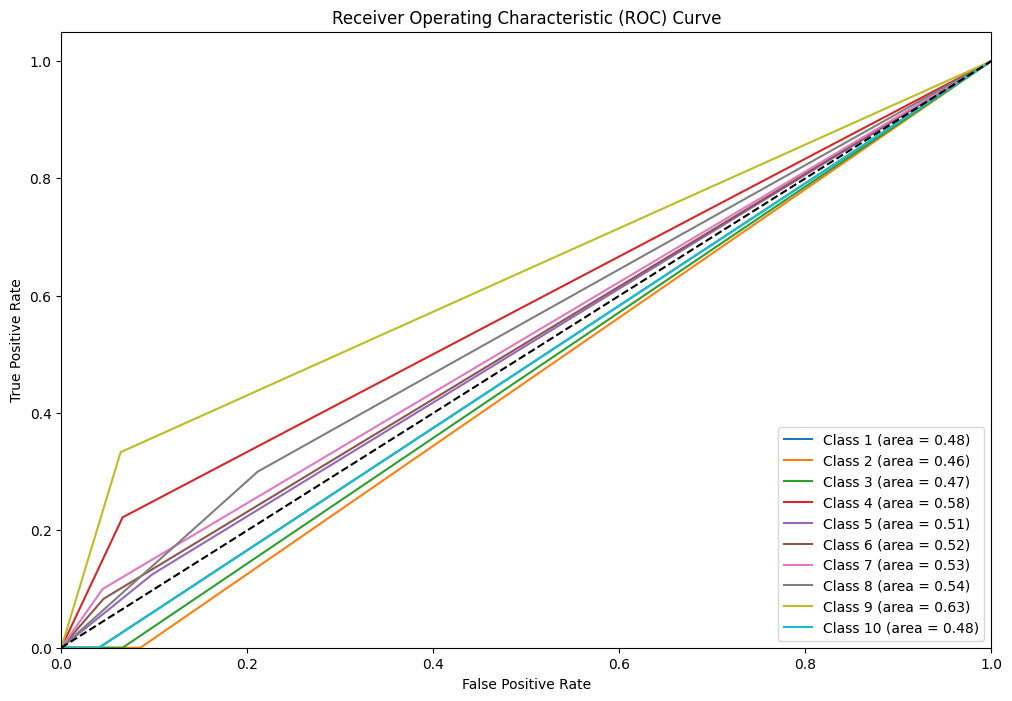

In [100]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_pred_binarized = label_binarize(y_pred, classes=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_binarized[:, i])

# Plot ROC curve
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i+1} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

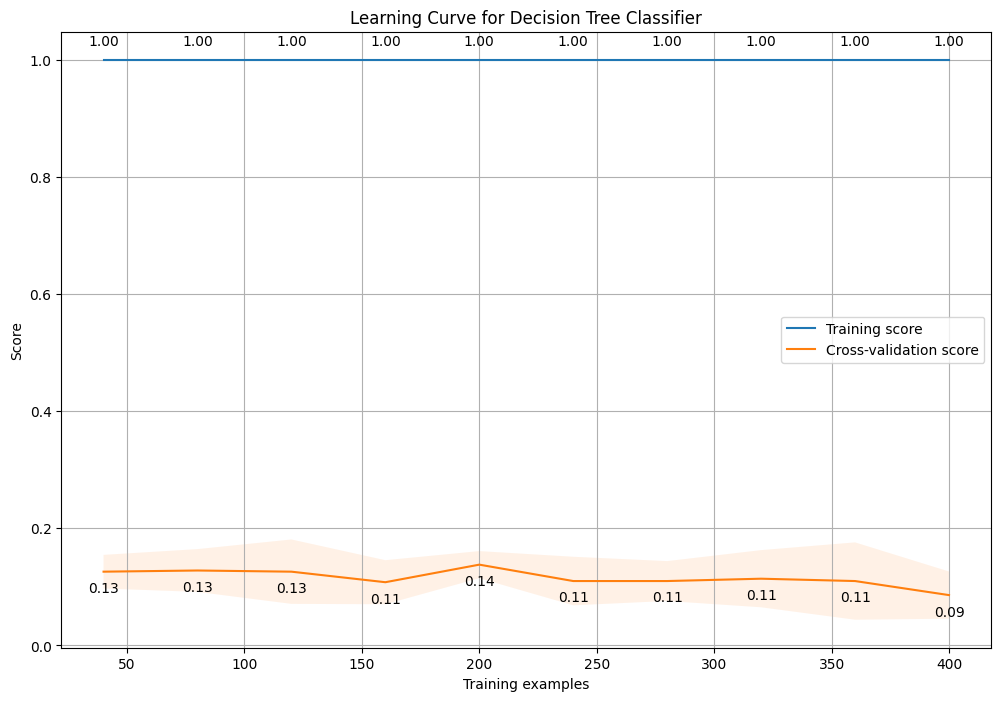

In [101]:
import numpy as np
from sklearn.model_selection import learning_curve

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(clf, X_scaled, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# Plot learning curve
plt.figure(figsize=(12, 8))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)

# Annotate the points with their values
for i in range(len(train_sizes)):
    plt.annotate(f'{train_scores_mean[i]:.2f}', (train_sizes[i], train_scores_mean[i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f'{test_scores_mean[i]:.2f}', (train_sizes[i], test_scores_mean[i]), textcoords="offset points", xytext=(0,-15), ha='center')

plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve for Decision Tree Classifier')
plt.legend(loc='best')
plt.grid()
plt.show()